### 线性回归
算法推导过程中已经给出了求解方法，基于最小二乘法直接求解，但这并不是机器学习的思想，由此引入了梯度下降方法。本次实验课重点讲解其中每一步流程与实验对比分析。

#### 主要内容：

- 线性回归方程实现
- 梯度下降效果
- 对比不同梯度下降策略
- 建模曲线分析
- 过拟合与欠拟合
- 正则化的作用
- 提前停止策略

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import warnings

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
warnings.filterwarnings('ignore')
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

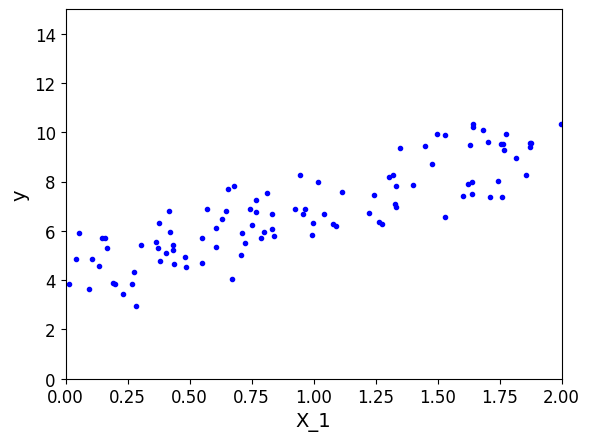

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[X, np.ones((100, 1))]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[2.76311238],
       [4.16665238]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[X_new, np.ones((2, 1))]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.16665238],
       [9.69287715]])

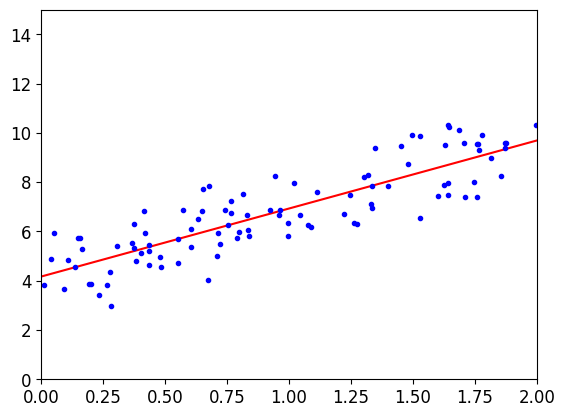

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X, y)
print(linear_regression.coef_)
print(linear_regression.intercept_)

[[2.76311238]]
[4.16665238]


#### 批量梯度下降

In [ ]:
learning_rate = 0.1
num_iterations = 1000
m = 100
theta = np.random.randn(2, 1)
for iteration in range(num_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

theta

array([[2.76311238],
       [4.16665238]])

In [9]:
X_new_b.dot(theta)

array([[4.16665238],
       [9.69287715]])

In [56]:
theta_path_bgd = []
def plot_gradient_descent(theta, learning_rate, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    num_iterations = 1000
    for iteration in range(num_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'b-')
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        if theta_path is not None:
            theta_path.append(theta)
    
    plt.xlabel('X_1')
    plt.axis([0, 2, 0, 15])
    plt.title('learning_rate = {}'.format(learning_rate))

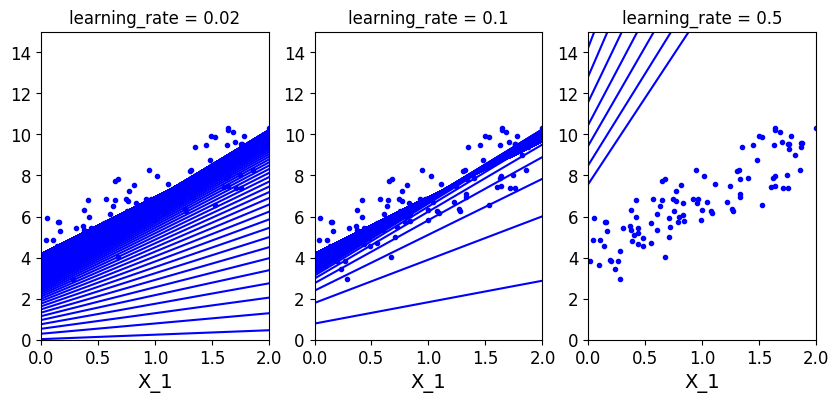

In [57]:
theta = np.random.randn(2, 1)
plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, learning_rate=0.02)
plt.subplot(132)
plot_gradient_descent(theta, learning_rate=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, learning_rate=0.5)
plt.show()

#### 随机梯度下降

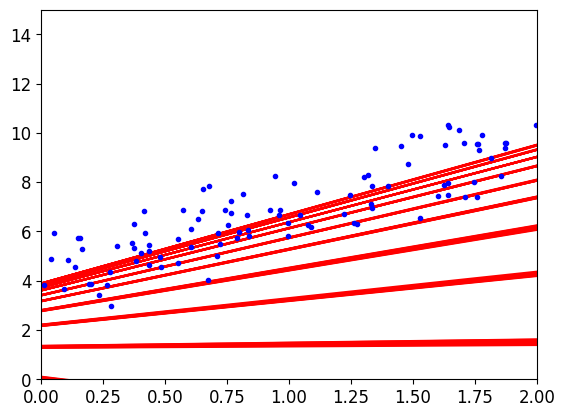

In [58]:
theta_path_sgd = []
m = len(X_b)
n_epochs = 50

t0 = 5
t1 = 50

def learning_rate_adjust(t):
    return t0 / (t1 + t)
theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch < 10 and i < 10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, 'r-')
        random_index = np.random.randint(m)
        x_i = X_b[random_index: random_index + 1]
        y_i = y[random_index: random_index + 1]
        gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
        learning_rate = learning_rate_adjust(n_epochs * m + i)
        theta = theta - learning_rate * gradients
        theta_path_sgd.append(theta)
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()


#### Minibatch梯度下降

In [59]:
theta_path_mgd = []
num_iterations = 50
minibatch = 16
theta = np.random.randn(2, 1)
np.random.seed(0)
t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch):
        t += 1
        x_i = X_b_shuffled[i : i + minibatch]
        y_i = y_shuffled[i : i + minibatch]
        gradients = 2 / minibatch * x_i.T.dot(x_i.dot(theta) - y_i)
        learning_rate = learning_rate_adjust(t)
        theta = theta - learning_rate * gradients
        theta_path_mgd.append(theta)
theta

array([[2.81644853],
       [4.10247734]])

#### 3种策略对比实验

In [60]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

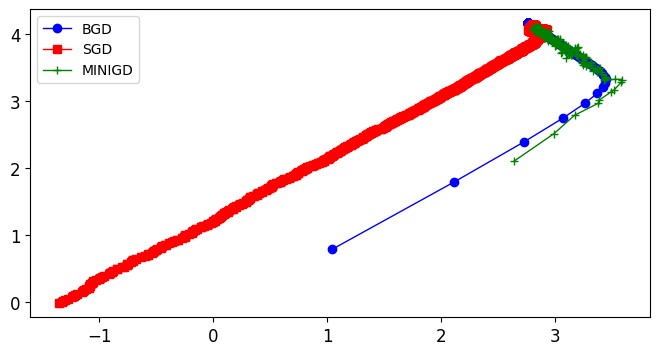

In [63]:
plt.figure(figsize=(8, 4))
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o',linewidth=1, label='BGD')
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s',linewidth=1, label='SGD')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+',linewidth=1, label='MINIGD')
plt.legend(loc='upper left')
# plt.axis([3.5, 4.5, 2.0, 4.0])
plt.show()

#### 多项式回归

In [67]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X ** 2 + X + np.random.randn(m, 1)

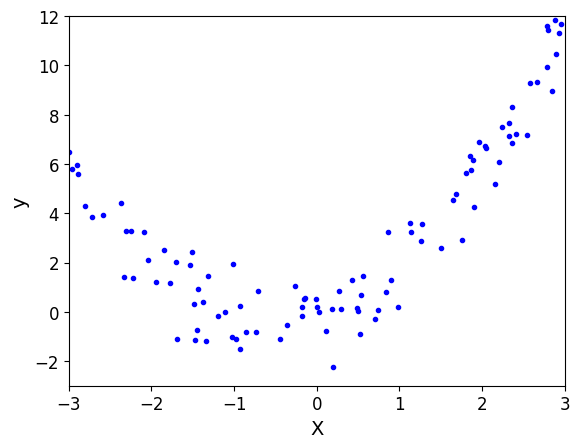

In [69]:
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.axis([-3, 3, -3, 12])
plt.show()


In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias =  False)
X_poly = poly.fit_transform(X)
print(X[0])
print(X_poly[0])

[-1.43442522]
[-1.43442522  2.05757571]


In [73]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_poly, y)
print(linear_regression.coef_)
print(linear_regression.intercept_)

[[0.97537751 0.99882515]]
[-0.15980126]


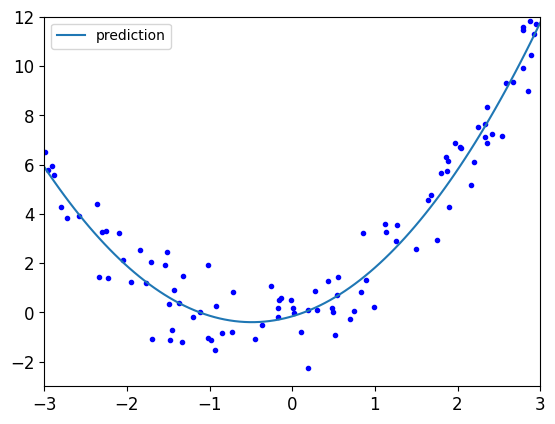

In [75]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new_predict = linear_regression.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new_predict, '-', label = 'prediction')
plt.axis([-3, 3, -3, 12])
plt.legend()
plt.show()

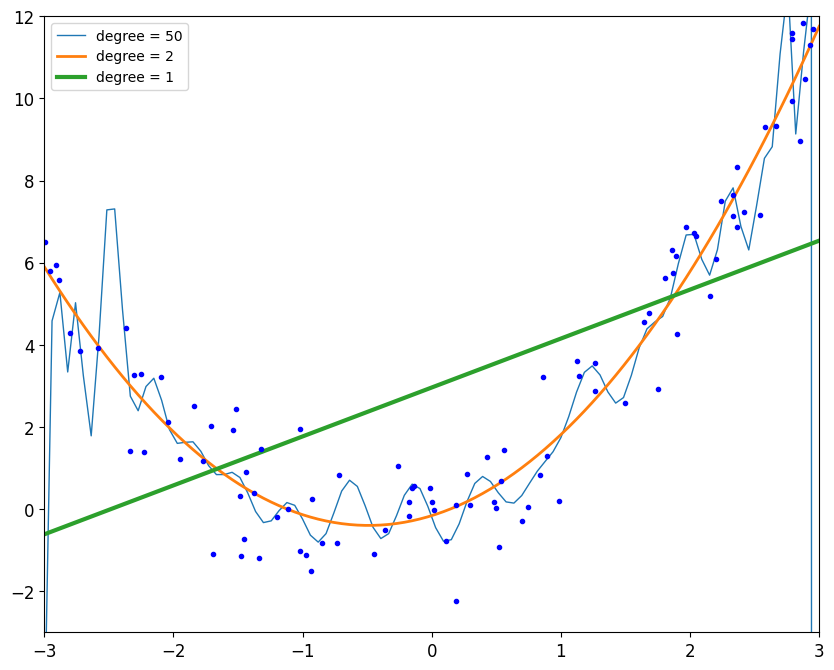

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
plt.figure(figsize = (10, 8))
for style, width, degree in (('g-', 1, 50), ('b--', 2, 2), ('r-+', 3, 1)):
    poly = PolynomialFeatures(degree = degree, include_bias = False)
    std = StandardScaler()
    linear_regression = LinearRegression()
    polynomial_regression = Pipeline(
        [
            ('PolynomialFeatures', poly), 
            ('StandardScaler', std), 
            ('LinearRegression', linear_regression)
        ]
    )
    polynomial_regression.fit(X, y)
    y_new_2 = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_new_2, label = 'degree = ' + str(degree), linewidth = width)
plt.plot(X, y, 'b.')
plt.axis([-3, 3, -3, 12])
plt.legend()
plt.show()

#### 数据样本数量对结果的影响

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_true=y_train[:m], y_pred=y_train_predict[:m]))
        test_errors.append(mean_squared_error(y_true=y_test, y_pred=y_test_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 1, label = 'train_error')
    plt.plot(np.sqrt(test_errors), 'b-', linewidth = 1, label = 'test_error')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()

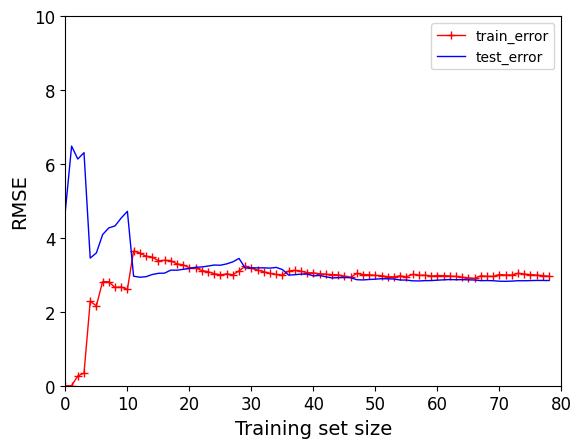

In [92]:
linear_regression = LinearRegression()
plot_learning_curves(linear_regression, X, y)
plt.axis([0, 80, 0, 10])
plt.show()

#### 多项式回归的过拟合风险

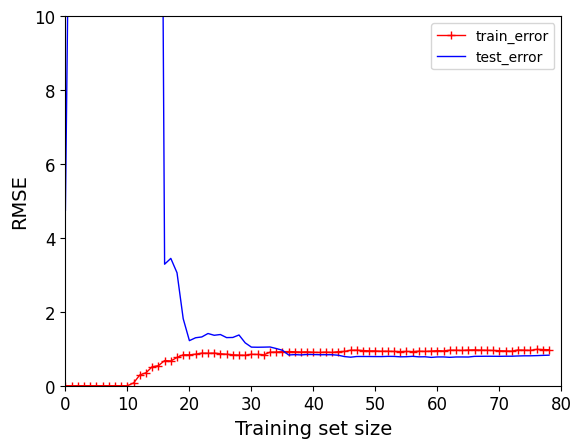

In [96]:
polynomial_regression = Pipeline(
        [
            ('PolynomialFeatures', PolynomialFeatures(degree=10, include_bias=False)), 
            ('LinearRegression', LinearRegression())
        ]
    )
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 10])
plt.show()

#### 正则化

对权重参数进行惩罚，让权重参数尽可能平滑一些，有两种不同的方法进行正则化惩罚：

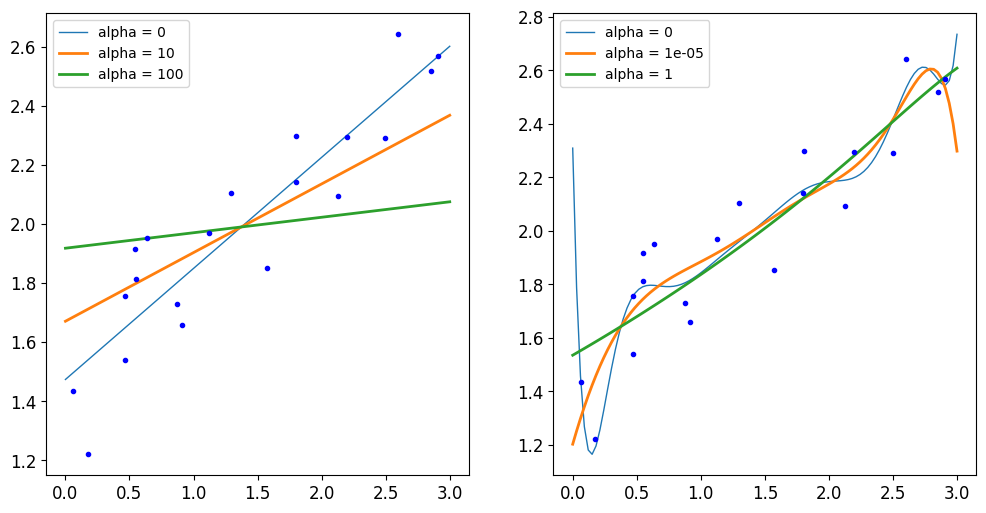

In [98]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m ,1)
y = 0.5 * X + np.random.rand(m, 1) / 1.5 + 1
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kwargs)
        if polynomial:
            model = Pipeline(
                [
                    ('PolynomialFeatures', PolynomialFeatures(degree=10, include_bias=False)), 
                    ('StandardScaler', StandardScaler()), 
                    ('Model', model)
                ]
            )
        model.fit(X, y)
        y_new_regularized = model.predict(X_new)
        linewidth = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regularized, linewidth = linewidth, label = 'alpha = {}'.format(alpha))
    plt.plot(X, y, 'b.', linewidth = 2)
    plt.legend()
plt.figure(figsize = (12, 6))
plt.subplot(121)
plot_model(Ridge, polynomial = False, alphas = (0, 10, 100))
plt.subplot(122)
plot_model(Ridge, polynomial = True, alphas = (0, 10 ** -5, 1))
plt.show()

惩罚力度越大，alpha值越大的时候，得到的决策方程越平稳。

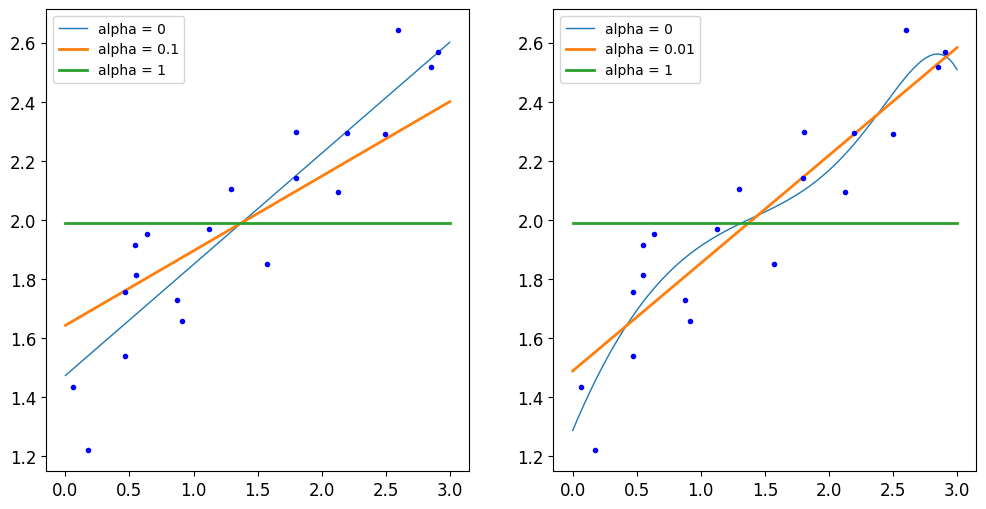

In [100]:
from sklearn.linear_model import Lasso
plt.figure(figsize = (12, 6))
plt.subplot(121)
plot_model(Lasso, polynomial = False, alphas = (0, 0.1, 1))
plt.subplot(122)
plot_model(Lasso, polynomial = True, alphas = (0, 10 ** -2, 1))
plt.show()